## Homework 2

* Import Boston Dataset from sklearn dataset class.
* Explore and analyse raw data.
* Do preprocessing for regression.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
* Evaluate the results of all models and choose the best performing model.

In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
#Import Load_Boston Data and I converted load_boston to Pandas Dataframe for data preprocessing.
X,y = load_boston(return_X_y=True)
df_boston = pd.DataFrame(X,columns = load_boston().feature_names)
df_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
#Before we do data preprocessing, we must know the story of the data.
#Load_boston data gives us boston house-prices dataset
#CRIM->per capita crime rate by town
#ZN->proportion of residential land zoned for lots over 25,000 sq.ft.
#PTRATIO->pupil-teacher ratio by town
#LSTAT->% lower status of the population

#Let's Observation
print("How much data do we have?",df_boston.shape[0])

print("Do we have any missing value?\n",df_boston.isnull().any())
#As we saw, we dont have any missing value.

#Also, we should observe our price(y) value.
minimum_price = np.min(y)
maximum_price = np.max(y)
mean_price = np.mean(y)
median_price = np.median(y)
std_price = np.std(y)
first_quartile = np.percentile(y, 25)
third_quartile = np.percentile(y, 75)
inter_quartile = third_quartile - first_quartile
print("""\nMin Price:{}\nMax Price:{}\nMean Price:{}\nMedian Price:{}\nStandard Deviation:{}\n""".format(minimum_price,maximum_price,mean_price,median_price,std_price))

How much data do we have? 506
Do we have any missing value?
 CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

Min Price:5.0
Max Price:50.0
Mean Price:22.532806324110677
Median Price:21.2
Standard Deviation:9.188011545278203



In [4]:
df_boston.info()
#There are no categorical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
#We also observe our features.
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


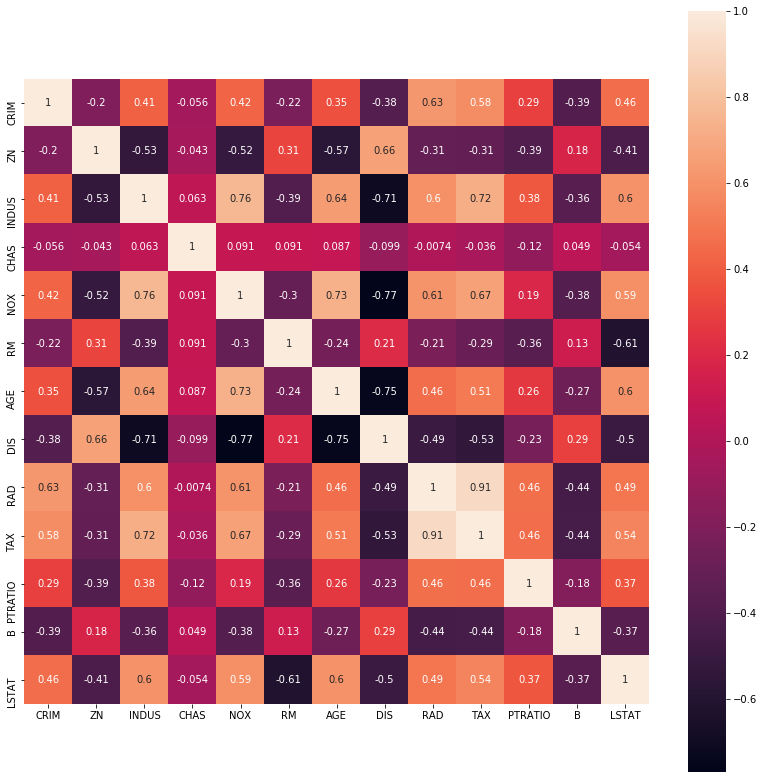

In [6]:
plt.figure(figsize=(14, 14))
sns.heatmap(df_boston.corr(),square=True, annot = True);
#From this heatmap table, we see that our TAX-RAD values have a high correlation of 0.91.
#This relationship can be normal because the RAD feature is defined as index of accessibility to radial highways.

In [7]:
#Now let's do the data preprocessing to enter the regression algorithm.
#There are no missing data and categorical variables.
#Examine and extract data that may be outlier.
#There are multiple ways to find Outlier data. Two of them are detecting with the boxplot graph and detecting with the Z-score. I will use the Z-score here.
z = np.abs(stats.zscore(df_boston))
outliers = list(set(np.where(z > 3)[0]))
new_df = df_boston.drop(outliers,axis = 0).reset_index(drop = False)
y_new = y[list(new_df["index"])]
X_new = new_df.drop('index', axis = 1)

In [8]:
#After separating our data as train and test, we will scaling.
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=15)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Set up and fit our model.
model = LinearRegression()
model.fit(X_train,y_train)
print("Score of the train set",model.score(X_train,y_train))
print("Score of the test set",model.score(X_test,y_test))

Score of the train set 0.7436430564911982
Score of the test set 0.7271891879744551


In [10]:
#We are trying our datasets with Lasso and Ridge Regressions.
ridge_alpha_values = [0.1,0.3,0.5,0.7,1.0]
lasso_alpha_values = [0.001,0.003,0.05,0.1,0.3]
def RidgeScores(ridge_alpha_values,X_train, X_test, y_train, y_test):
    counter = 1
    for i in ridge_alpha_values:
        ridge_model = Ridge(alpha = i)
        ridge_model.fit(X_train, y_train)
        print(counter," Ridge Train: ", ridge_model.score(X_train, y_train))
        print(counter," Ridge Test: ", ridge_model.score(X_test, y_test))
        counter+=1
def LassoScores(lasso_alpha_values,X_train, X_test, y_train, y_test):
    counter = 1
    for i in lasso_alpha_values:
        lasso_model = Lasso(alpha = i)
        lasso_model.fit(X_train, y_train)
        print(counter," Lasso Train: ", lasso_model.score(X_train, y_train))
        print(counter," Lasso Test: ", lasso_model.score(X_test, y_test))
        counter+=1
RidgeScores(ridge_alpha_values,X_train, X_test, y_train, y_test)
print("*************************************************")
LassoScores(lasso_alpha_values,X_train, X_test, y_train, y_test)

1  Ridge Train:  0.7435731672171859
1  Ridge Test:  0.7309280022399081
2  Ridge Train:  0.7430929321454608
2  Ridge Test:  0.7370242535527731
3  Ridge Train:  0.742285338521299
3  Ridge Test:  0.7417098481837583
4  Ridge Train:  0.7412481940709192
4  Ridge Test:  0.7453427034716845
5  Ridge Train:  0.7393894819028916
5  Ridge Test:  0.7493270801348424
*************************************************
1  Lasso Train:  0.7436298901493721
1  Lasso Test:  0.7284245322390535
2  Lasso Train:  0.7435248351421211
2  Lasso Test:  0.7307700975107575
3  Lasso Train:  0.722533523558268
3  Lasso Test:  0.7456178501096993
4  Lasso Train:  0.7068811464137725
4  Lasso Test:  0.7368791152017639
5  Lasso Train:  0.6566297570780544
5  Lasso Test:  0.698808331965738


* When i evaluate all these models, we see that the most accurate model is the Ridge Regression's model with an alpha value of 0.5.
